In [1]:
# Importing the necessary packages
import numpy as np                                  # "Scientific computing"
import scipy.stats as stats                         # Statistical tests

import random
import math

import pandas as pd                                 # Data Frame
from pandas.api.types import CategoricalDtype

import matplotlib.pyplot as plt                     # Basic visualisation
from statsmodels.graphics.mosaicplot import mosaic  # Mosaic diagram
import seaborn as sns                               # Advanced data visualisation
import altair as alt                                # Alternative visualisation system

# Lab 3.02 - Statistical hypothesis testing

## Exercise 1 - Binding recommendation on continuation of studies 

It is being said that introducing a “binding recommendation on continuation of studies” (refusing enrollment in the next academic year if a student did not complete a certain level of credits, NL: "bindend studie-advies, BSA") has a positive effect on the study efficiency and success rate. Before the introduction of binding recommendations, the number of completed credits per student per year was 44 with a standard deviation of 6.2. After the introduction, a sample of 72 random students has an average number of completed credits of 46.2.

1. Test whether there is evidence that the introduction of binding recommendations has improved the success rate among students. Calculate the critical value for a significance level of $\alpha = 2.5\%$.
2. Do the same by calculating the $p$-value.
3. Interpret the meaning of $\alpha$ being 2.5%.

p-value: 0.00130
p < a: reject H0
Critical value g ≃ 45.432
sample mean = 46.200 > g = 45.432: reject H0


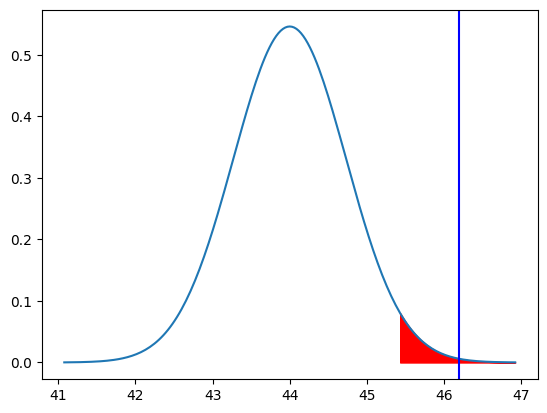

In [2]:
 
# Population
mu = 44
s = 6.2

# Sample
n = 72
mu_sample = 46.2
s_sample = s / math.sqrt(n)

a = 0.025

#1
# X-values
dist_x = np.linspace(mu - 4 * s_sample, mu + 4 * s_sample, num=201)
# Y-values for drawing the Gauss curve
dist_y = stats.norm.pdf(dist_x, mu, s_sample)
# Plot the Gauss-curve
plt.plot(dist_x, dist_y)

# Fill the area left of x
plt.fill_between(dist_x, 0, dist_y, where=(dist_x >= stats.norm.isf(a, mu, s_sample)), color='red')
# Show the mean with an orange line
plt.axvline(mu_sample, color="blue")

  
#2 P-value

p = stats.norm.sf(mu_sample, loc=mu, scale=s_sample)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")
    
g = stats.norm.isf(a, loc = mu, scale = s_sample)
print("Critical value g ≃ %.3f" % g)
if (mu_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (mu_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (mu_sample, g))    



### Answers

1. $g \approx 45.4 < x = 46.2$.

    $x$ is inside the critical region, so we can reject the null hypothesis. Therefore, we can assume that binding recommendation on continuation of studies does increase the success rate.

2. $P(M > 46.2) \approx 0.0013 < \alpha = 0.025$. The probability value is smaller than the significance level, so we can reject the null hypothesis.
3. $\alpha$ represents the probability of rejecting a true null hypothesis $H_0$. In other words, there is a 2.5% chance that you wrongly conclude that the success rate has increased.


## Exercise 2 - Car dealers

One of the motives for choosing a car dealership is the resale value of the previous car, or more specifically the price a dealer wants to pay for the old car when the customer buys a new one. The importer of Ford wants that all dealers implement the same price policy.

The importer is of the opinion that the average price difference between the closest Ford dealer and the dealer where the old car was purchased should be at most €300. It is assumed that, if the difference is larger, potential customers will be more inclined to stay with their previous
dealer.

In a random sample, the following price differences are recorded:

```
[400, 350, 400, 500, 300, 350, 200,
 500, 200, 250, 250, 500, 350, 100]
```

Test whether there is reason to assume that the average price difference in reality is significantly greater than €300, using a significance level of 5%.

Critical value g ≃ 358.417
sample mean = 332.143 < g = 358.417: do not reject H0
p-value: 0.17381
p > a: do not reject H0


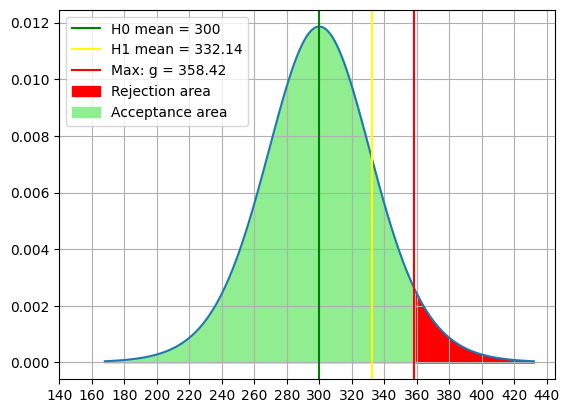

In [54]:
import numpy as np
import scipy.stats as stats   
import matplotlib.pyplot as plt  

# H0 = Mean is 300
# H1 = Mean is larger than 300 = right tailed t-test

sample = np.array([400, 350, 400, 500, 300, 350, 200,
 500, 200, 250, 250, 500, 350, 100])

m0 = 300
a = 0.05

n_sample = sample.size
s_sample = sample.std(ddof=1)
mu_sample = sample.mean()
  
  
g = stats.t.isf(a, loc = m0, scale = s_sample / np.sqrt(n_sample), df=n_sample - 1)
print("Critical value g ≃ %.3f" % g)
if (mu_sample < g):
    print("sample mean = %.3f < g = %.3f: do not reject H0" % (mu_sample, g))
else:
    print("sample mean = %.3f > g = %.3f: reject H0" % (mu_sample, g))



p = stats.t.sf(mu_sample, loc=m0, scale= s_sample / np.sqrt(n_sample), df=n_sample - 1)
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")


x_axis = np.linspace(m0 - 4 * s_sample / np.sqrt(n_sample), m0 + 4 * s_sample / np.sqrt(n_sample), 201)
y_axis =  stats.t.pdf(x_axis, loc=m0, scale=s_sample / np.sqrt(n_sample), df=n_sample - 1)
    
plt.plot(x_axis, y_axis)

plt.axvline(m0, color='green', label=f'H0 mean = {m0}')
plt.axvline(mu_sample, color='yellow', label=f'H1 mean = {mu_sample.round(2)}')
plt.axvline(g, color='red', label=f"Max: g = {g.round(2)}")

plt.fill_between(x_axis, 0,y_axis , where=(x_axis >= g), color='red', label="Rejection area")
plt.fill_between(x_axis, 0,y_axis , where=(x_axis <= g), color='lightgreen', label="Acceptance area")

plt.xticks(np.arange(140 , 460 , 20))

plt.grid(True)
plt.legend()

### Answers

In this context ($n = 14 < 30$) the $z$-test cannot be used. Instead, we use Student’s $t$-test.

- $x \approx 332.143$
- $s \approx 123.424$
- $g \approx 358.42$. The sample mean is outside of the critical region, so we cannot reject $H_0$.
- $p \approx 0.1738$. $p \nless \alpha$ , so we cannot reject $H_0$. Based on this sample there is no reason to assume that the average price difference on the residual value of old cars is significantly higher than the amount recommended by the importer.

## Exercise 3 - rlanders.csv, revisited

The variable *Money* represents a gross annual salary (×100\\$). We assume this variable has a mean of $\mu = 500$ with standard deviation $\sigma = 98$. If we calculate the sample mean over the entire dataset (do this yourself!), it seems to support our assumptions. But what if we looked at
men and women separately (variable *Gender*)?

First, visualise this case by plotting a kernel density estimate of the variable *Money* over the entire dataset and split up according to *Gender*. Draw a vertical line for the assumed population mean and sample means.

Use an appropriate statistical test to verify the statements below, usinge a significance level of $\alpha = 5\%$. For each statement, calculate the critical value(s) and the $p$-value.

1. The average gross annual salary of men seems higher than the average. Is it also significantly higher?
2. The average gross annual salary of women seems lower. Is it significantly lower?
3. Calculate the region of acceptance for the average gross annual salary for the sample (men and women combined). In this case we want to verify if the sample mean is significantly different from the expected value, but it can be lower or higher.



In [11]:
import pandas as pd
import seaborn as sns

ds = pd.read_csv("..\\data\\rlanders.csv").set_index("ID")
ds.head()  

,Gender,Money,Days,Months,Count,Survey
ID,,,,,,
1,Female,440,29,11,35,3
2,Female,503,23,10,52,3
3,Male,412,16,11,55,3
4,Male,587,25,9,28,5
5,Male,525,30,11,41,4


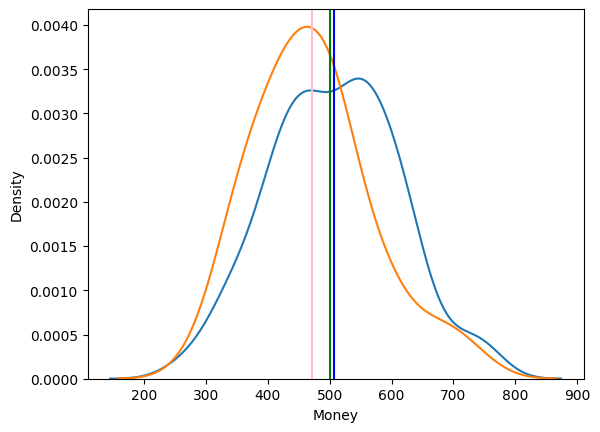

p-value: 0.13964
p > a: do not reject H0


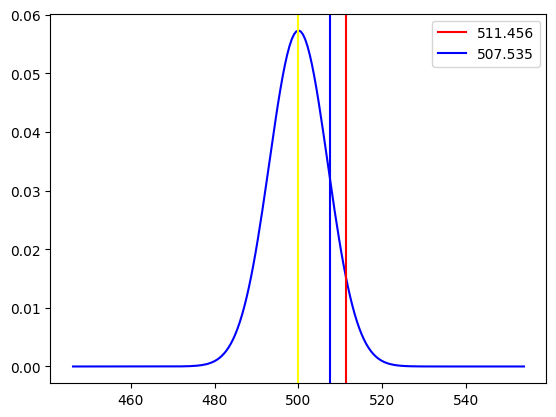

p-value: 0.01989
p < a: reject H0
Acceptance region [g1, g2] ≃ [487.852, 512.148]
Sample mean women = 477.646 is outside acceptance region: reject H0
Acceptance region [g1, g2] ≃ [487.852, 512.148]
Sample mean men = 511.456 is inside acceptance region: do not reject H0


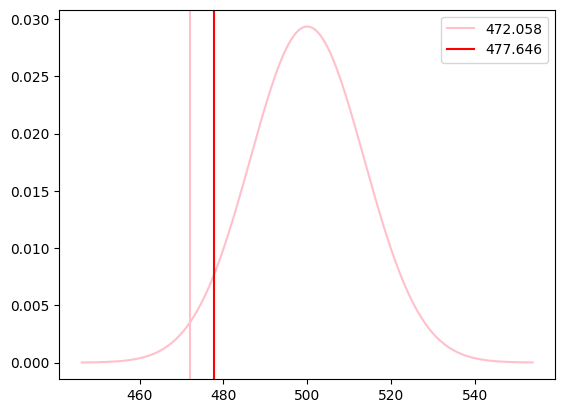

In [90]:
mu = 500
s = 98
a = 0.05
n = ds['Money'].count()

n_fem = ds.query('Gender == "Female"')['Money'].size
mu_fem = ds.query('Gender == "Female"')['Money'].mean()
s_fem = ds.query('Gender == "Female"')['Money'].std() / math.sqrt(n_fem)

n_male = ds.query('Gender == "Male"')['Money'].size
mu_male = ds.query('Gender == "Male"')['Money'].mean()
s_male = ds.query('Gender == "Male"')['Money'].std() / math.sqrt(n_male)

#1
sns.kdeplot(ds.query('Gender == "Male"')['Money'])
sns.kdeplot(ds.query('Gender == "Female"')['Money'])
plt.axvline(mu_male, color='blue')
plt.axvline(mu_fem, color='pink')
plt.axvline(mu, color='green')
plt.show()

# X-values
dist_x = np.linspace(mu - 4 * s_fem, mu + 4 * s_fem, num=201)
# Y-values for drawing the Gauss curve
dist_y_fem = stats.norm.pdf(dist_x, mu, s / np.sqrt(n_fem))
dist_y_male = stats.norm.pdf(dist_x, mu, s / np.sqrt(n_male))

# Plot the Gauss-curve
plt.plot(dist_x, dist_y_male, color='blue')

# Fill the area left of x
# plt.fill_between(dist_x, 0, dist_y, where=(dist_x <= x), color='lightblue')
# Show the mean with an orange line
plt.axvline(mu, color="yellow")

#2.a Right taled z-test
p = stats.norm.sf(mu_male, loc=mu, scale=s/np.sqrt(n_male))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

max_male = stats.norm.isf(a , mu,  s / np.sqrt(n_male)) 
plt.axvline(max_male, color="red", label=max_male.round(3))
plt.axvline(mu_male, color="blue", label=mu_male.round(3)) 
plt.legend()
plt.show()

#2.b Left taled z-test
p = stats.norm.cdf(mu_fem, loc=mu, scale=s/np.sqrt(n_fem))
print("p-value: %.5f" % p)
if(p < a):
    print("p < a: reject H0")
else:
    print("p > a: do not reject H0")

plt.plot(dist_x, dist_y_fem, color='pink') 
min_fem = stats.norm.ppf(a , mu,  s / np.sqrt(n_fem)) 
plt.axvline(mu_fem, color="pink", label=mu_fem.round(3))
plt.axvline(min_fem, color="red", label=min_fem.round(3))
plt.legend()

#3
#mu = ds['Money'].mean() 
g1 = stats.norm.ppf(a/2, loc = mu, scale = s / np.sqrt(n))
g2 = stats.norm.isf(a/2, loc = mu, scale = s / np.sqrt(n))

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < min_fem and min_fem < g2):
    print("Sample mean women = %.3f is inside acceptance region: do not reject H0" % min_fem)
else:
    print("Sample mean women = %.3f is outside acceptance region: reject H0" % min_fem)
 
g1 = stats.norm.ppf(a/2, loc = mu, scale = s / np.sqrt(n))
g2 = stats.norm.isf(a/2, loc = mu, scale = s / np.sqrt(n))

print("Acceptance region [g1, g2] ≃ [%.3f, %.3f]" % (g1,g2))
if (g1 < max_male and max_male < g2):
    print("Sample mean men = %.3f is inside acceptance region: do not reject H0" % max_male)
else:
    print("Sample mean men = %.3f is outside acceptance region: reject H0" % max_male)
 
 

 

### Answers

1. Sample mean: $\overline{x} \approx 507.535$, critical value: $g \approx 511.456$, $p \approx 0.1396$. We can **not** reject the null hypothesis. The gross annual income of men in this sample is not significantly higher than expected.
2. Sample mean: $\overline{x} \approx 472.058$, critical value: $g \approx 477.646$, $p \approx 0.0199$. We can reject the null hypothesis. The gross annual income of women in this sample is significantly lower than expected.
3. The acceptance region is the interval $[487.852, 512.148]$.